### INTRODUCTION and PROBLEM
>Maven cloud limited is a telecommunication company with a problem of making sense of its collected call records towards making accurate predictions of the most likely phone call-type to receive in the future with the corresponding features


## Import relevant libraries

In [51]:
#import the data manipulation libraries for our analysis and machine learning
import pandas as pd
import numpy as np
import statistics as stat
import datetime


#import the data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Importing data encoding libraries
from sklearn.preprocessing import LabelEncoder

# Importing data scaling libraries
from sklearn.preprocessing import StandardScaler

#Evaluation libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from sklearn import metrics 
from sklearn.metrics import confusion_matrix

## Import the dataset

In [52]:
# load the dataset
data = pd.read_csv("mavencloudlimited_call_records.csv")

## Make a copy of the dataset

In [53]:
# Make a Copy of the dataset
df = data.copy()
df

,call_id,destination_person_id,source_person_id,account_age,account_state,occupation,language,call_direction,call_duration,call_outcome,call_end_date,call_topics,call_topic_group
0,2807990,86394,269898,301,In Repayment,Farmer,Luganda,Incoming,0.78,Call Resolved,10/21/17 4:01,Call Dropped,Other
1,2807991,86394,320367,122,In Repayment,Other,Luganda,Incoming,1.93,Call Resolved,10/21/17 4:04,Code Not Received,Codes
2,2807992,212967,129042,695,In Repayment,Mechanic / Technician,Luganda,Incoming,4.90,Call Resolved,10/21/17 4:05,RP Remote Technical,Accessory Technical Issue
3,2807993,114159,372282,22,In Repayment,Farmer,Lango,Incoming,3.77,Call Resolved,10/21/17 4:06,Code Not Received,Codes
4,2807994,86394,366749,44,In Repayment,Electrician,Luganda,Incoming,2.62,Call Resolved,10/21/17 4:07,Code Not Received,Codes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32023,2855830,338414,361079,68,In Repayment,Small Business Owner,Lunyankore,Incoming,6.55,Call Resolved,11-03-17 15:08,MM Issue,Finance
32024,2855832,157397,302921,183,In Repayment,Farmer,Ma'di,Incoming,12.90,Call Resolved,11-03-17 15:09,"Redeem Code, Code Entry Support",Codes
32025,2855835,80646,229800,386,In Repayment,Farmer,Luganda,Incoming,1.25,Call Resolved,11-03-17 15:09,Ended Call- Hearing/Speaking Issues,Other
32026,2855836,338372,8029,1146,Cancelled,Boda Boda,English,Incoming,2.98,Call Resolved,11-03-17 15:10,Account Association,Sales


### Having a look at the data

In [54]:
# View columns/titles in the data set
df.columns

Index(['call_id', 'destination_person_id', 'source_person_id', 'account_age',
       'account_state', 'occupation', 'language', 'call_direction',
       'call_duration', 'call_outcome', 'call_end_date', 'call_topics',
       'call_topic_group'],
      dtype='object')

In [55]:
# Count the number of entries per column and the data type of each
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32028 entries, 0 to 32027
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   call_id                32028 non-null  int64  
 1   destination_person_id  32028 non-null  int64  
 2   source_person_id       32028 non-null  int64  
 3   account_age            32028 non-null  int64  
 4   account_state          32028 non-null  object 
 5   occupation             31933 non-null  object 
 6   language               32027 non-null  object 
 7   call_direction         32028 non-null  object 
 8   call_duration          32028 non-null  float64
 9   call_outcome           32028 non-null  object 
 10  call_end_date          32028 non-null  object 
 11  call_topics            32028 non-null  object 
 12  call_topic_group       32028 non-null  object 
dtypes: float64(1), int64(4), object(8)
memory usage: 3.2+ MB


From the above output, we can see that the dataset has floats, intergers and string dtypes, with some missing values and a total of 13 columns

## Exploratory Data Analysis

In [56]:
# load the first 5 observations of the dataset
df.head()

,call_id,destination_person_id,source_person_id,account_age,account_state,occupation,language,call_direction,call_duration,call_outcome,call_end_date,call_topics,call_topic_group
0,2807990,86394,269898,301,In Repayment,Farmer,Luganda,Incoming,0.78,Call Resolved,10/21/17 4:01,Call Dropped,Other
1,2807991,86394,320367,122,In Repayment,Other,Luganda,Incoming,1.93,Call Resolved,10/21/17 4:04,Code Not Received,Codes
2,2807992,212967,129042,695,In Repayment,Mechanic / Technician,Luganda,Incoming,4.90,Call Resolved,10/21/17 4:05,RP Remote Technical,Accessory Technical Issue
3,2807993,114159,372282,22,In Repayment,Farmer,Lango,Incoming,3.77,Call Resolved,10/21/17 4:06,Code Not Received,Codes
4,2807994,86394,366749,44,In Repayment,Electrician,Luganda,Incoming,2.62,Call Resolved,10/21/17 4:07,Code Not Received,Codes


In [57]:
# load the last 5 observations of the dataset
data.tail()

,call_id,destination_person_id,source_person_id,account_age,account_state,occupation,language,call_direction,call_duration,call_outcome,call_end_date,call_topics,call_topic_group
32023,2855830,338414,361079,68,In Repayment,Small Business Owner,Lunyankore,Incoming,6.55,Call Resolved,11-03-17 15:08,MM Issue,Finance
32024,2855832,157397,302921,183,In Repayment,Farmer,Ma'di,Incoming,12.90,Call Resolved,11-03-17 15:09,"Redeem Code, Code Entry Support",Codes
32025,2855835,80646,229800,386,In Repayment,Farmer,Luganda,Incoming,1.25,Call Resolved,11-03-17 15:09,Ended Call- Hearing/Speaking Issues,Other
32026,2855836,338372,8029,1146,Cancelled,Boda Boda,English,Incoming,2.98,Call Resolved,11-03-17 15:10,Account Association,Sales
32027,2855837,124255,387315,0,In Repayment,Small Business Owner,Luganda,Incoming,3.08,Call Resolved,11-03-17 15:11,Account Association,Sales


The above outputs show the first 5 and last 5 observations of the dataset. This is majorly because its a large dataset
and we cant thus load the whole of it so we load just a few observations from it just to get a glimpse of it.

In [58]:
#Check for duplicates
df.duplicated().sum()

0

Therefore, the data has no duplicated entries/ fields

In [59]:
# Descriptive Statistics
df.describe(include="all")

,call_id,destination_person_id,source_person_id,account_age,account_state,occupation,language,call_direction,call_duration,call_outcome,call_end_date,call_topics,call_topic_group
count,3.202800e+04,32028.000000,32028.000000,32028.000000,32028,31933,32027,32028,3.202800e+04,32028,32028,32028,32028
unique,NaN,NaN,NaN,NaN,4,36,29,2,NaN,12,10951,1210,12
top,NaN,NaN,NaN,NaN,In Repayment,Farmer,Luganda,Incoming,NaN,Call Resolved,10/21/17 12:52,Completions Call,Codes
freq,NaN,NaN,NaN,NaN,28349,11484,9517,24286,NaN,27214,19,4226,7244
mean,2.831672e+06,176398.621956,238985.845354,342.367085,NaN,NaN,NaN,NaN,-1.565586e+03,NaN,NaN,NaN,NaN
std,1.374674e+04,97753.450380,106046.655869,306.645479,NaN,NaN,NaN,NaN,1.987238e+05,NaN,NaN,NaN,NaN
min,2.807990e+06,73.000000,89.000000,-10.000000,NaN,NaN,NaN,NaN,-2.514926e+07,NaN,NaN,NaN,NaN
25%,2.819686e+06,108351.000000,155159.000000,64.000000,NaN,NaN,NaN,NaN,1.550000e+00,NaN,NaN,NaN,NaN
50%,2.831604e+06,134577.000000,239082.000000,298.000000,NaN,NaN,NaN,NaN,3.580000e+00,NaN,NaN,NaN,NaN
75%,2.843481e+06,239005.000000,338348.250000,573.000000,NaN,NaN,NaN,NaN,6.200000e+00,NaN,NaN,NaN,NaN


The above output gives us a picture of the general distribution of features in the dataset interms of their means, modes, medians, min and max values, those with missing values and all. This output hence guides the process of data preprocessing.

##### Creating a simple function to help with some descriptive stats of the data

In [60]:
def stats(dataset):
    print(dataset.describe())
    print(dataset.shape)
    print(dataset.info())

In [61]:
stats(df)

            call_id  destination_person_id  source_person_id   account_age  \
count  3.202800e+04           32028.000000      32028.000000  32028.000000   
mean   2.831672e+06          176398.621956     238985.845354    342.367085   
std    1.374674e+04           97753.450380     106046.655869    306.645479   
min    2.807990e+06              73.000000         89.000000    -10.000000   
25%    2.819686e+06          108351.000000     155159.000000     64.000000   
50%    2.831604e+06          134577.000000     239082.000000    298.000000   
75%    2.843481e+06          239005.000000     338348.250000    573.000000   
max    2.855837e+06          387319.000000     387407.000000   1430.000000   

       call_duration  
count   3.202800e+04  
mean   -1.565586e+03  
std     1.987238e+05  
min    -2.514926e+07  
25%     1.550000e+00  
50%     3.580000e+00  
75%     6.200000e+00  
max     5.787000e+01  
(32028, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32028 entries, 0 to 32027
Da

In [62]:
print("The data set has", df.shape[0],"rows and",df.shape[1],"columns.")

The data set has 32028 rows and 13 columns.


## Feature Engineering

Dealing with the identified Missing values

In [63]:
# Create table for missing data analysis
def draw_missing_data_table(dataset):
    total = dataset.isnull().sum().sort_values(ascending=False)
    percent = (dataset.isnull().sum()/dataset.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total Nulls in dataset', 'Percent of Nulls'])
    return missing_data

In [64]:
# Analyse missing data
draw_missing_data_table(df)

,Total Nulls in dataset,Percent of Nulls
occupation,95,0.002966
language,1,0.000031
call_id,0,0.000000
destination_person_id,0,0.000000
source_person_id,0,0.000000
account_age,0,0.000000
account_state,0,0.000000
call_direction,0,0.000000
call_duration,0,0.000000
call_outcome,0,0.000000


In [65]:
# Drop the missing values
df = df.dropna()
df.isnull().sum()

call_id                  0
destination_person_id    0
source_person_id         0
account_age              0
account_state            0
occupation               0
language                 0
call_direction           0
call_duration            0
call_outcome             0
call_end_date            0
call_topics              0
call_topic_group         0
dtype: int64

From the above output, there are two columns with missing values ie occupation and language. And since the numbers of
missing values or insignificant values, we can just drop them and continues with other preprocessing procedures.

#### Creation of a simple table to compare the incoming and outgoing calls for each topic group

In [66]:
# We can make a pivot table to sum up the number of incoming calls' and outgoing calls' durations in seconds for each call topic group 

compare_table = pd.pivot_table(data=df, index='call_topic_group', columns='call_direction', values='call_duration', aggfunc=lambda x: np.sum(abs(x)), fill_value=0)
compare_table

call_direction,Incoming,Outgoing
call_topic_group,,
Accessory Non-Technical Issue,1152.71,19.63
Accessory Technical Issue,5001.99,150.11
Accounts,3496.14,54.62
Codes,25182331.76,544.45
Finance,21310.78,2242.58
General,6694.81,709.23
Other,25157870.81,1166.09
Portfolio Health,781.47,233.76
Sales,24801.47,5302.85


In [67]:
# We sum the call_duraction for each call_direction segment and then divide it with 60 to return number of minutes.
print("Incoming calls are a total of", abs(df.loc[df['call_direction'] == 'Incoming'].call_duration.sum())/60, "minutes.")
print("whereas")
print("Outgoing calls are a total of", abs(df.loc[df['call_direction'] == 'Outgoing'].call_duration.sum())/60, "minutes.")

Incoming calls are a total of 836235.9698333333 minutes.
whereas
Outgoing calls are a total of 519.6533333333334 minutes.


# PROBLEM: THE CALL TYPE [call_direction] MOST LIKELY TO EXPECT IN FUTURE PREDICTABILITY FROM THE DATA 

> Let us first look at the target varibale [call_direction] column and see what it constitutes. This observation is meant to help discover a few things about the variable namely: its distribution, unique values and so on

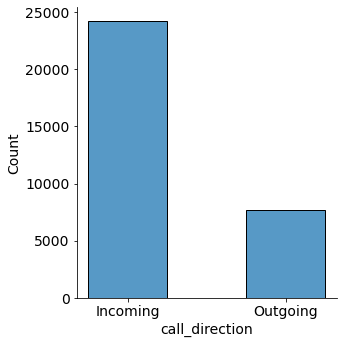

In [68]:
# let us plot a distribution plot to see how the target variable looks like
sns.displot(df, x = "call_direction", shrink = .5)

In [69]:
df.call_direction.value_counts()

Incoming    24231
Outgoing     7702
Name: call_direction, dtype: int64

> We can see from the plot above that incoming [24231] is more than outgoing [7702]. This gives us an overview of the distribution of the two values we have at hand. It alsio shows there's to be more learning in the incoming calls as opposed to the outgoing

In [70]:
df.columns


Index(['call_id', 'destination_person_id', 'source_person_id', 'account_age',
       'account_state', 'occupation', 'language', 'call_direction',
       'call_duration', 'call_outcome', 'call_end_date', 'call_topics',
       'call_topic_group'],
      dtype='object')

In [71]:
# dropping the columns that are insignificant to my analysis
df = df.drop(columns=[ 'call_id', 'destination_person_id', 'source_person_id', 'occupation', 
                      'language', 'call_end_date', 'call_topics'])
df.columns

Index(['account_age', 'account_state', 'call_direction', 'call_duration',
       'call_outcome', 'call_topic_group'],
      dtype='object')

Checking for outliers

C:\Users\hi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='account_age'>

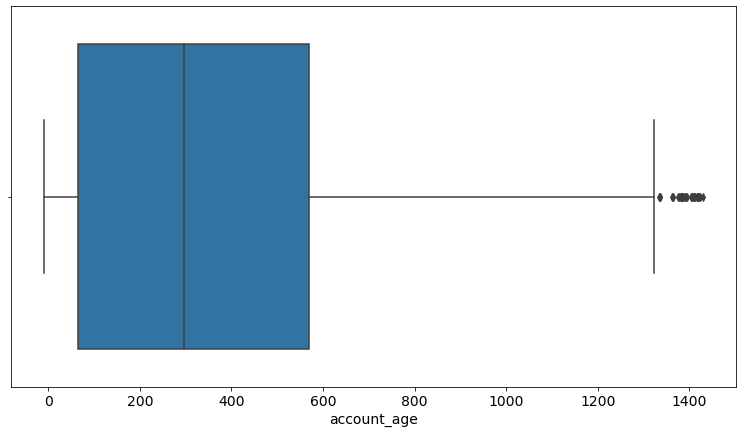

In [72]:
#Detect and remove outliers: account_age

plt.figure(figsize=(13,7))
sns.boxplot(df.account_age)

C:\Users\hi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='account_age'>

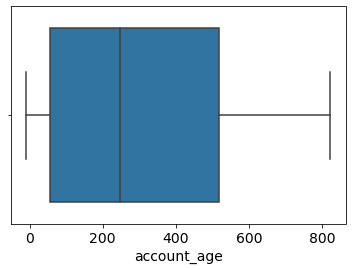

In [73]:
# removing the outliers in account_age using the IQR

def remove_outlier(col):
    q25 = col.quantile(0.25)
    q75 = col.quantile(0.75)
    iqr = q75 - q25
    cutoff = iqr*0.5
    upper = q75 + cutoff
    return upper

upper = remove_outlier(df.account_age)

df = df.loc[(df.account_age < upper)]

sns.boxplot(df.account_age)

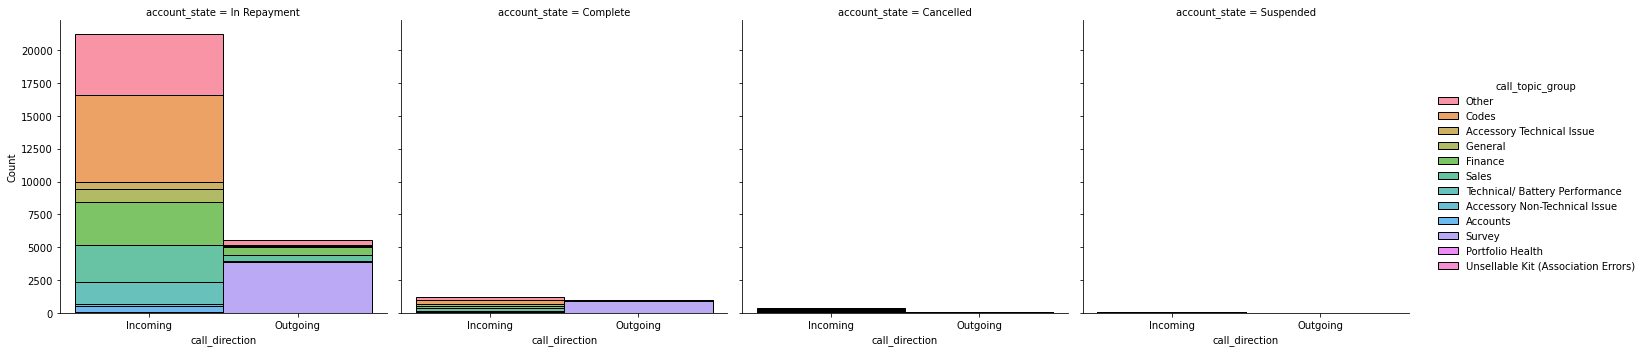

In [24]:
# We can as well break down the distribution and narrow it down to account state and call topic group in regards to call direction. 
#We can use this information for our reporting

sns.displot(data=df, x="call_direction", hue="call_topic_group", multiple="stack", col="account_state")

> Now the evidence in the graphs above have already given us the answer but we can use some machine learning and statistics for more informed/accurate answers to our problem. 

## MODELLING OF THE DATA AND MACHINE LEARNING

In [74]:
# first we plot the confusion matrix and the learning curve

# 1. Confusion matrix

col_names = ['Incoming', 'Outgoing']

################################################
## Confusion Matrix Plot true vs pred values  ##
################################################
def CM(y_test, y_pred_test, col_names, model='model', fs=(8,6)):
    
    plt.rcParams.update({'font.size': 14})
    
    # Forming confusion matrix
    c_matrix = confusion_matrix(y_test, y_pred_test)
    
    plt.figure(figsize=fs)
    sns.heatmap(c_matrix, annot=True, annot_kws={'size':15},
                fmt=".0f", cmap=plt.cm.Purples, linewidths=5)
    
    tick_marks = np.arange(len(col_names))
    plt.xticks(tick_marks + 0.5, col_names)
    plt.yticks(tick_marks + 0.5, col_names, rotation=0)
    plt.xlabel('Precicted label')
    plt.ylabel('True label')
    plt.title(f'Confusion Matrix for {model} Model')
    plt.show()

In [75]:
# 2. Plot the training and validation curves
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Validation score")

    plt.legend(loc="best")
    return plt

> ### The pariplot below is a representation of the correlations that are present in the data set

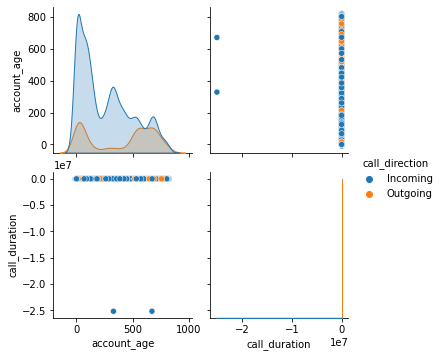

In [28]:
sns.pairplot(df, hue='call_direction')
plt.show()

> Now let us do the modelling using sklearn

> We have to split the data as necessary into training and test sets

In [76]:
# But first, Let us encode the categorical value columns
# using labelEnconder

le = LabelEncoder()

def encode(data_set, column):
    data_set[str(column)] = le.fit_transform(data_set[str(column)])

In [77]:
list_of_columns = ['account_age', 'account_state', 'call_direction', 'call_duration',
       'call_outcome', 'call_topic_group']


for item in list_of_columns:
    encode(df,item)

In [78]:
df.sample(10)

,account_age,account_state,call_direction,call_duration,call_outcome,call_topic_group
31808,5,2,0,228,0,8
8764,555,2,0,244,0,3
28528,279,2,0,206,0,4
4042,213,2,0,124,0,3
9951,202,2,0,168,0,3
3237,647,1,0,215,0,8
7218,53,2,0,30,0,6
29166,415,3,0,617,0,4
26885,242,2,0,313,8,4
13563,66,2,0,232,0,3


In [79]:
df.call_direction.unique()

array([0, 1])

In [80]:
#We select the values for X and y sets 
X = df.drop('call_direction', 1)
y = df.call_direction

C:\Users\hi\AppData\Local\Temp\ipykernel_2692\3982118084.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df.drop('call_direction', 1)


In [81]:
# checking for the values of y set
y

0        0
1        0
2        0
3        0
4        0
        ..
32022    0
32023    0
32024    0
32025    0
32027    0
Name: call_direction, Length: 29517, dtype: int32

In [82]:
# checking for the value of X set
X

,account_age,account_state,call_duration,call_outcome,call_topic_group
0,306,2,49,0,6
1,127,2,118,0,3
2,700,2,296,0,1
3,27,2,228,0,3
4,49,2,159,0,3
...,...,...,...,...,...
32022,178,2,613,0,3
32023,73,2,395,0,4
32024,188,2,775,0,3
32025,391,2,77,0,6


In [83]:
#Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [84]:
#checking for the count of unique values in the test set
y_test.value_counts()

0    6813
1    2043
Name: call_direction, dtype: int64

In [85]:
#Seeing how many are in the test dataset
X_test.shape

(8856, 5)

In [86]:
#Seeing how many are in the train dataset
y_test.shape

(8856,)

In [40]:
#Fitting the Logistic Regression model

# Now we model
from sklearn.linear_model import LogisticRegression

# using default parameters
model = LogisticRegression(solver='liblinear', random_state=0)

# fit the model
model = model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)

#print the tunable parameters (kept as default)
params = model.get_params()
print(params)

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 0, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


> Once we have fitted (trained) the model, we can make predictions using the predict() function. We pass the values of x_test to this method and compare the predicted values called y_pred with y_test values to check how accurate our predicted values are.

In [41]:
#Actual value and the predicted value
a = pd.DataFrame({'Actual value': y_test, 'Predicted value':y_pred})
a.sample(10)

,Actual value,Predicted value
4200,0,0
20538,0,0
1527,0,0
6549,0,0
21801,0,0
19536,0,0
7774,1,1
11218,0,0
21472,0,0
26514,1,1


> Evaluation of the model

In [42]:
# Let us evaluate the model using the confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[6425,  388],
       [ 791, 1252]], dtype=int64)

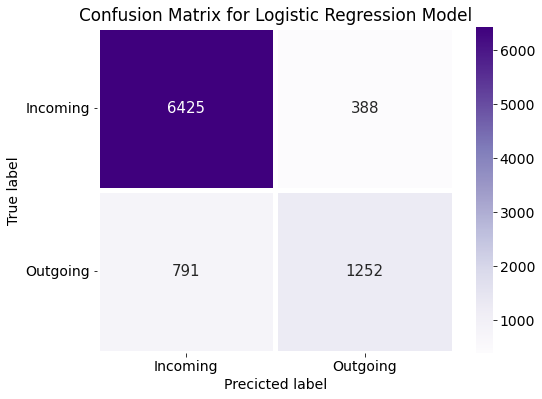

In [43]:
#Plotting the Confusion matrix and classification report

CM(y_test, y_pred, col_names=col_names, model='Logistic Regression')

Therefore, the logistic model predicted that there are 6426 incoming calls that are actually incoming calls as compared to the 1252 outgoing calls that are actually outgoing calls.

However, it also predicted 791 false nagative incoming calls as as well as  388 false positives outgoing calls

In [44]:
# checking for accuracy of our model
y_ac = accuracy_score(y_test, y_pred)

print(f'Accuracy Score: {y_ac:.3f}\n')

Accuracy Score: 0.867



Therefore, the logistic model is 86.7% accurate of its predictions.

In [45]:
# Evaluating the model using the classification report

report = classification_report(y_test, y_pred, target_names=["Incoming", "Outgoing"])
print(report)

              precision    recall  f1-score   support

    Incoming       0.89      0.94      0.92      6813
    Outgoing       0.76      0.61      0.68      2043

    accuracy                           0.87      8856
   macro avg       0.83      0.78      0.80      8856
weighted avg       0.86      0.87      0.86      8856



### We got a classification rate of 87%, which is considered as quite good accuracy.

> Precision : The Logistic Regression model predicted calls are incoming, those calls have 89% predicted accuracy.

> Recall : The Logistic Regression model  recalls 94% of all incoming calls in the test set per 100

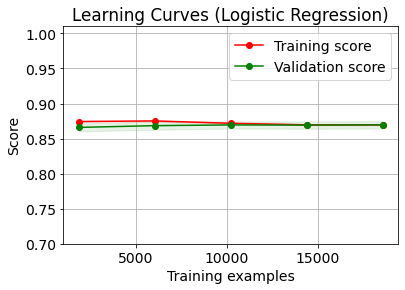

In [46]:
# Plot learning curves
title = "Learning Curves (Logistic Regression)"
cv = 10
plot_learning_curve(model, title, X_train, y_train, ylim=(0.7, 1.01), cv=cv, n_jobs=1);

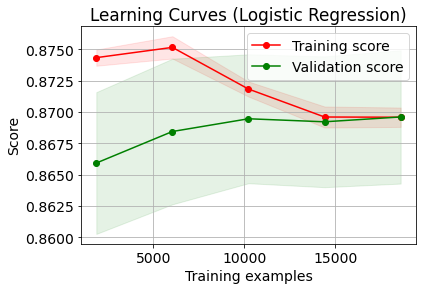

In [47]:
# Plot learning curves
title = "Learning Curves (Logistic Regression)"
cv = 10
plot_learning_curve(model, title, X_train, y_train,cv=cv, n_jobs=1);

Since the training and validation scores are convergent at a lower score , therefore we are certain that the logistic model isn't effectively generalizing upon the dataset.

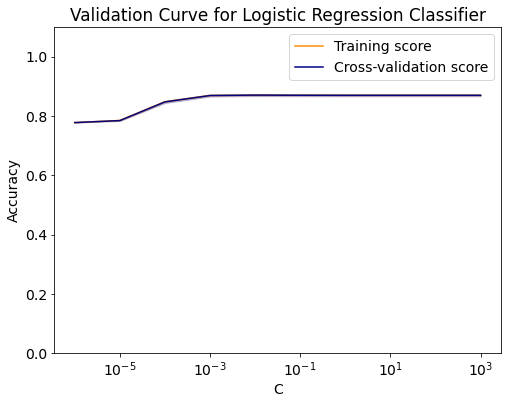

In [48]:
# HYPERPARAMATOR TUNING THE MODEL

# Define the hyperparameter values to test
param_range = np.logspace(-6, 3, 10)

# Create the validation curve
train_scores, test_scores = validation_curve(LogisticRegression(penalty='l2', max_iter=10000), X_train, y_train, param_name="C", param_range=param_range, scoring="accuracy", cv=5
)

# Calculate the mean and standard deviation of the training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the validation curve
plt.figure(figsize=(8, 6))
plt.title("Validation Curve for Logistic Regression Classifier")
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.ylim(0.0, 1.1)
plt.semilogx(param_range, train_mean, label="Training score", color="darkorange")
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.2, color="darkorange")
plt.semilogx(param_range, test_mean, label="Cross-validation score", color="navy")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, alpha=0.2, color="navy")
plt.legend(loc="best")
plt.show()


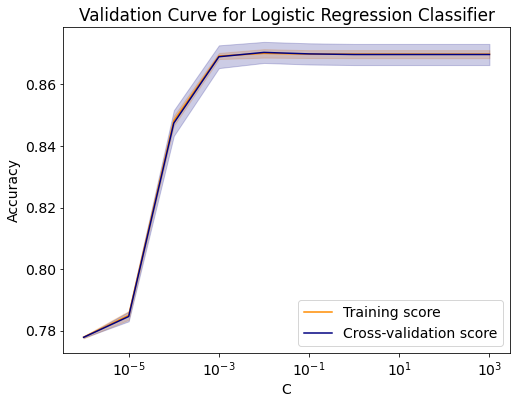

In [49]:
# Define the hyperparameter values to test
param_range = np.logspace(-6, 3, 10)

# Create the validation curve
train_scores, test_scores = validation_curve(LogisticRegression(penalty='l2', max_iter=10000), X_train, y_train, param_name="C", param_range=param_range, scoring="accuracy", cv=5
)

# Calculate the mean and standard deviation of the training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the validation curve
plt.figure(figsize=(8, 6))
plt.title("Validation Curve for Logistic Regression Classifier")
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.semilogx(param_range, train_mean, label="Training score", color="darkorange")
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.2, color="darkorange")
plt.semilogx(param_range, test_mean, label="Cross-validation score", color="navy")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, alpha=0.2, color="navy")
plt.legend(loc="best")
plt.show()

And upon hyper parameter tuning the logistic meodel, the validation curves comfirms that the model is now performing better and thus the model a goof fit upon learning on the training dataset and the validation dataset

## TRYING OUT OUR DATASET ON OTHER MACHINE LEARNING MODELS.

### Decision Tree Model

In [87]:
# Decision tree classifier

from sklearn.tree import DecisionTreeClassifier

# Create the DecisionTreeClassifier 
DT = DecisionTreeClassifier(random_state=0)

# Fitting Model
DT.fit(X_train, y_train)

# Getting Predictions
DT_pred = DT.predict(X_test)

In [88]:
# Model Accuracy, how often is the classifier correct
DT_ac = accuracy_score(y_test, DT_pred)

print(f'Accuracy Score: {DT_ac:.3f}\n')

Accuracy Score: 0.930



The Decision Tree Model is giving us a better accuracy score at 93% as compared to the earlier score of the logisitic model

In [89]:
#Actual value and the predicted value of the Decision Tree Classifier
a = pd.DataFrame({'Actual value': y_test, 'Predicted value':DT_pred})
a.sample(10)

,Actual value,Predicted value
29221,0,0
8239,1,1
10239,0,0
12793,0,0
7189,0,0
5255,1,1
26710,1,1
5784,0,0
26526,1,1
26475,0,0


In [90]:
# checking for the predictability in the test set
DT_pred_df = pd.DataFrame(pd.Series(DT_pred).value_counts(), columns=['Test Outcome'])
pd.concat([y_test.value_counts(), DT_pred_df], axis=1)

,call_direction,Test Outcome
0,6813,6829
1,2043,2027


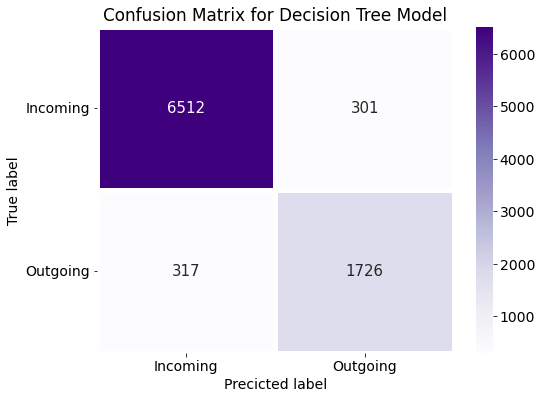

In [42]:
CM(y_test, DT_pred, col_names=col_names, model='Decision Tree')

Therefore, the Descision Tree model predicted that there are 6512 incoming calls that are actually incoming calls as compared to the 1726 outgoing calls that are actually outgoing calls.

However, it also predicted 317 false nagative incoming calls as as well as  301 false positives outgoing calls.

In conclusion, the model got the correct predictions most part of the time and is thus providing more reliable predictions

In [91]:
# evaluating using the classification report
report = classification_report(y_test, DT_pred, target_names=["Incoming", "Outgoing"])
print(report)

              precision    recall  f1-score   support

    Incoming       0.95      0.96      0.95      6813
    Outgoing       0.85      0.84      0.85      2043

    accuracy                           0.93      8856
   macro avg       0.90      0.90      0.90      8856
weighted avg       0.93      0.93      0.93      8856



### We got a classification rate of accuracy of 93%, which is considered as a very good accuracy.

> Precision : The DT model predicted calls are incoming, those calls have 95% predicted accuracy.

> Recall : The DT model  recalls 96% of all incoming calls in the test set per 100

### 3. SUPPORT VECTOR MACHINE

In [56]:
# Import svm model
from sklearn import svm

# Create a svm Classifier
clf = svm.SVC(cache_size=7000, random_state=0)  # Polynomial Kernel

# Train the model using the training sets
clf.fit(X_train, y_train)

# Predict the response for the test dataset
clf_pred = clf.predict(X_test)

In [57]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, clf_pred))


Accuracy: 0.7869241192411924


The SVM therefore predicts with an accuracy of 78.6%

In [58]:
#Actual value and the predicted value of the Decision Tree Classifier
a = pd.DataFrame({'Actual value': y_test, 'Predicted value':clf_pred})
a.sample(10)

,Actual value,Predicted value
25296,0,0
7763,1,0
18089,0,0
8371,0,1
20869,0,0
11997,0,0
2355,0,0
16113,1,1
24358,0,0
5801,0,0


In [59]:
# checking for the predictability in the test set
clf_pred_df = pd.DataFrame(pd.Series(clf_pred).value_counts(), columns=['Test Outcome'])
pd.concat([y_test.value_counts(), clf_pred_df], axis=1)

,call_direction,Test Outcome
0,6813,8368
1,2043,488


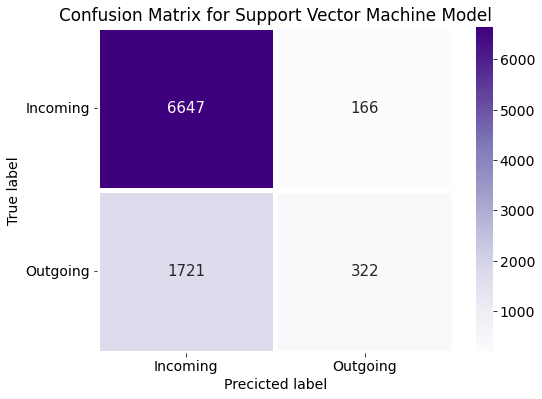

In [60]:
CM(y_test, clf_pred, col_names=col_names, model='Support Vector Machine')

Therefore, the SVM model predicted that there are 6647 incoming calls that are actually incoming calls as compared to the 322 outgoing calls that are actually outgoing calls.

However, it also predicted 1721 false nagative incoming calls as as well as  166 false positives outgoing calls.

In conclusion, this machine was highly biased on the incoming calls as compared to the outgoing calls hence not a good algorithm for this analysis.

In [61]:
# evaluating using the classification report
report = classification_report(y_test, y_pred, target_names=["Incoming", "Outgoing"])
print(report)

              precision    recall  f1-score   support

    Incoming       0.89      0.94      0.92      6813
    Outgoing       0.76      0.61      0.68      2043

    accuracy                           0.87      8856
   macro avg       0.83      0.78      0.80      8856
weighted avg       0.86      0.87      0.86      8856



The SVM is having an equivalent accurate score like that of the logistic regression model of 87%

## In conclusion, the Decision Tree Classifier performs best amongst all the model and thus the most appropriate algorithm for the machine learning and prediction on the Maven Cloud Limited call dataset at 93%
> The model thus predicted that we are likely to expect more incoming calls in the future as compared to the outgoing at a 93% accuracy degree of confidence.

## FEATURE INMPORTANCE

In [62]:
ind = DT.feature_importances_.argsort()[::-1]
features = DT.feature_importances_[ind]
cols = X_train.columns[ind]
for i in range(len(X_test.columns)):
    print(cols[i], features[i])

call_topic_group 0.6969278483258384
call_duration 0.12126996622033964
account_age 0.09114226652971619
call_outcome 0.08529989708836398
account_state 0.005360021835741664


Therefore, call_topic_group and account_state are the most and least important features, consecutively, as per our predicative analysis